In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("/workspaces/logistic-regression-project-tutorial/bank-marketing-campaign-data.csv",delimiter=";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
data.pdays
minmax = ["pdays","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","age","duration","previous","campaign"]
encoder = ["marital","education","default","housing","contact","month","day_of_week","poutcome","y","job"]
len(minmax)+len(encoder)

20

In [7]:
ct = make_column_transformer(
    (MinMaxScaler(),minmax),
    (OneHotEncoder(handle_unknown="ignore"),encoder)
)



X = data.drop(["loan"],axis=1)
y = data["loan"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13,train_size=0.8)

ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
#y_train_normal = ct.transform(y_train)
#y_test_normal = ct.transform(y_test)

In [8]:
model1 = LogisticRegression()

model1.fit(X_train_normal,y_train)

LogisticRegression()

In [9]:
y_pred = model1.predict(X_test_normal)
accuracy_score(y_pred,y_test)

0.851541636319495

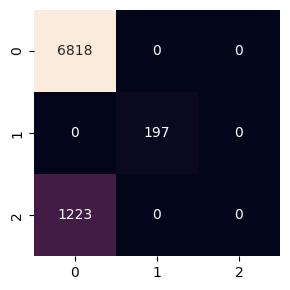

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()